# Austin is the Live Music Capital of the World... and so much more.

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
df_original = pd.read_csv('Desktop/Thinkful/Austin_crime.csv')
df_original.head(3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2019891702,CRIMINAL TRESPASS,2716,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0,...,11.00,C,03/30/2019,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,20195013370,THEFT,600,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0,...,21.07,N,04/03/2019,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,20172571868,AGG ROBBERY/DEADLY WEAPON,300,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0,...,18.04,O,09/20/2017,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)"


## General Information

In [100]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124418 entries, 0 to 2124417
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate                   float64
Y-coordin

In [5]:
df = df_original.copy()
del df['Incident Number']
del df['Highest Offense Code']
del df['Report Date']
del df['Report Time']
del df['Clearance Status']
del df['Council District']
del df['APD Sector']
del df['Census Tract']
del df['UCR Category']
del df['X-coordinate']
del df['Y-coordinate']
del df['APD District']
del df['PRA']
del df['Clearance Date']

In [6]:
df.head(3)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701.0,NaN,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,THEFT,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,RESIDENCE / HOME,5512 GLOUCESTER LN,78723.0,Theft,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,AGG ROBBERY/DEADLY WEAPON,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752.0,Robbery,30.333542,-97.705762,"(30.33354183, -97.70576196)"


# Part 2

Let's take a look closer on BURGLARY OF VEHICLE (since it is the most popular crime). You can't leave without a car in Austin. And it's necessary to make your car safe.

Just FYI:
Texas Penal Code 30.04 – **Burglary of Vehicles**
(a) A person commits an offense if, without the effective consent of the owner, he breaks into or enters a vehicle or any part of a vehicle with intent to commit any felony or theft. (2) any physical object connected with the body.

In [103]:
from datetime import datetime

In [104]:
# convert the columns with date information into a datetime format
from datetime import datetime
df['report_dt'] = pd.to_datetime(df['Report Date Time'], format='%m/%d/%Y %I:%M:%S %p')

In [105]:
#['year']= pd.to_datetime(df['Occurred Date'], format='%m/%d/%Y').dt.year

In [106]:
df['hour']= pd.to_datetime(df['Occurred Date Time'], format='%m/%d/%Y %I:%M:%S %p').dt.hour

In [107]:
#crimes_per_tod = df['Occurred Date'].dt.hour.value_counts().sort_index()

In [108]:
df.head(3)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location,report_dt,hour
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701.0,NaN,30.269060,-97.734085,"(30.26905967, -97.73408544)",2019-03-30 20:59:00,20.0
1,THEFT,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,RESIDENCE / HOME,5512 GLOUCESTER LN,78723.0,Theft,30.302208,-97.680177,"(30.30220794, -97.6801768)",2019-04-01 15:47:00,18.0
2,AGG ROBBERY/DEADLY WEAPON,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752.0,Robbery,30.333542,-97.705762,"(30.33354183, -97.70576196)",2017-09-14 22:37:00,22.0


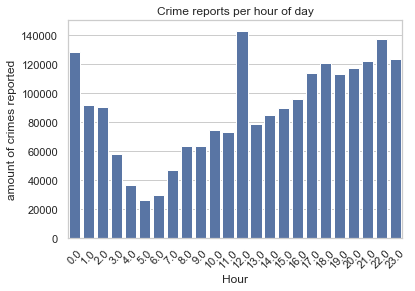

In [109]:
crimes_per_tod = df.hour.value_counts()
g = sns.barplot(x=crimes_per_tod.index, y=crimes_per_tod.values, color='b')
g.set(xlabel='Hour', ylabel='amount of crimes reported')
plt.title('Crime reports per hour of day')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

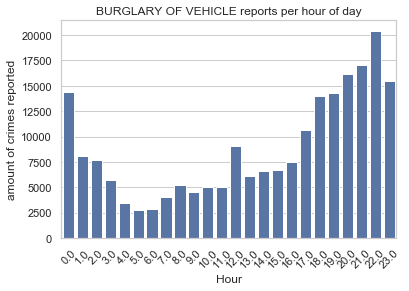

In [110]:
BOV_time = df[df['Highest Offense Description'] == 'BURGLARY OF VEHICLE'].hour.value_counts()
g = sns.barplot(x=BOV_time.index, y=BOV_time.values, color='b')
g.set(xlabel='Hour', ylabel='amount of crimes reported')
plt.title('BURGLARY OF VEHICLE reports per hour of day')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

In [111]:
BOV = df[df['Highest Offense Description'] == 'BURGLARY OF VEHICLE']
BOV

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location,report_dt,hour
6,BURGLARY OF VEHICLE,N,10/11/2014 05:00:00 PM,10/11/2014,1700.0,10/12/2014 04:13:00 AM,PARKING LOTS / GARAGE,E 7TH ST / TRINITY ST,78701.0,Theft,30.268006,-97.738955,"(30.26800598, -97.73895531)",2014-10-12 04:13:00,17.0
18,BURGLARY OF VEHICLE,N,03/14/2019 07:39:00 PM,03/14/2019,1939.0,03/14/2019 07:39:00 PM,PARKING LOTS / GARAGE,4625 W WILLIAM CANNON DR,78749.0,Theft,30.223360,-97.843593,"(30.22336021, -97.8435927)",2019-03-14 19:39:00,19.0
24,BURGLARY OF VEHICLE,N,03/29/2019 05:00:00 PM,03/29/2019,1700.0,03/29/2019 06:50:00 PM,PARK / PLAYGROUND,6701 LAKEWOOD DR,78731.0,Theft,30.365915,-97.787250,"(30.3659152, -97.7872499)",2019-03-29 18:50:00,17.0
30,BURGLARY OF VEHICLE,N,03/30/2019 01:57:00 PM,03/30/2019,1357.0,03/30/2019 01:57:00 PM,RESIDENCE / HOME,5207 MAULDING PASS,78749.0,Theft,30.227914,-97.849239,"(30.22791429, -97.8492395)",2019-03-30 13:57:00,13.0
61,BURGLARY OF VEHICLE,N,04/14/2013 12:00:00 AM,04/14/2013,0.0,04/14/2013 04:34:00 PM,RESIDENCE / HOME,4806 BRUSHY RIDGE DR,78744.0,Theft,30.181749,-97.750189,"(30.18174904, -97.75018899)",2013-04-14 16:34:00,0.0
125,BURGLARY OF VEHICLE,N,03/29/2019 10:00:00 AM,03/29/2019,1000.0,03/29/2019 10:18:00 AM,HOTEL / MOTEL / ETC.,11301 BURNET RD,78758.0,Theft,30.397169,-97.719105,"(30.39716921, -97.71910498)",2019-03-29 10:18:00,10.0
147,BURGLARY OF VEHICLE,N,03/03/2017 09:31:00 PM,03/03/2017,2131.0,03/03/2017 09:31:00 PM,PARKING LOTS / GARAGE,9500 S IH 35 SVRD SB,78748.0,Theft,30.162911,-97.793123,"(30.16291061, -97.79312325)",2017-03-03 21:31:00,21.0
148,BURGLARY OF VEHICLE,N,04/09/2015 11:00:00 PM,04/09/2015,2300.0,04/10/2015 09:35:00 AM,RESIDENCE / HOME,7507 BROOKHOLLOW DR,78752.0,Theft,30.327213,-97.681829,"(30.32721282, -97.68182903)",2015-04-10 09:35:00,23.0
167,BURGLARY OF VEHICLE,N,03/28/2019 06:00:00 PM,03/28/2019,1800.0,03/29/2019 10:05:00 AM,RESIDENCE / HOME,917 E 50TH ST,78751.0,Theft,30.310564,-97.714687,"(30.31056361, -97.71468653)",2019-03-29 10:05:00,18.0
177,BURGLARY OF VEHICLE,N,10/08/2018 08:45:00 AM,10/08/2018,845.0,10/08/2018 02:14:00 PM,RESIDENCE / HOME,12800 TURTLE ROCK RD,78729.0,Theft,30.451578,-97.774139,"(30.45157753, -97.7741391)",2018-10-08 14:14:00,8.0


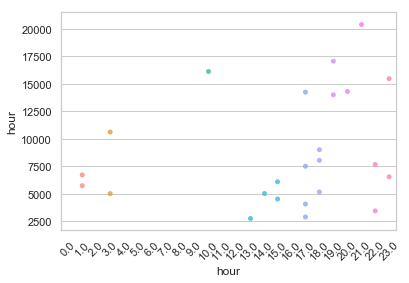

In [37]:
BOV = df[df['Highest Offense Description'] == 'BURGLARY OF VEHICLE']
g = sns.stripplot(x='hour', y=BOV_time,
              data=df, dodge=True, jitter=False,
              alpha=0.8, zorder=1)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

In [17]:
from datetime import date
import calendar

In [114]:

df['weekday'] = pd.to_datetime(df['Occurred Date Time'], format='%m/%d/%Y %I:%M:%S %p').dt.dayofweek


In [115]:
df.head(1)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location,report_dt,hour,weekday
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701.0,NaN,30.26906,-97.734085,"(30.26905967, -97.73408544)",2019-03-30 20:59:00,20.0,5.0


In [116]:

df.weekday = df.weekday.apply(lambda x: str(x)[:1])

In [117]:

df.weekday = df.weekday.apply(lambda x: x.replace('0', 'Monday') if '0' in str(x) else x)

df.weekday = df.weekday.apply(lambda x: x.replace('1', 'Tuesday') if '1' in str(x) else x)
df.weekday = df.weekday.apply(lambda x: x.replace('2', 'Wednsday') if '2' in str(x) else x)
df.weekday = df.weekday.apply(lambda x: x.replace('3', 'Thursday') if '3' in str(x) else x)
df.weekday = df.weekday.apply(lambda x: x.replace('4', 'Friday') if '4' in str(x) else x)
df.weekday = df.weekday.apply(lambda x: x.replace('5', 'Saturday') if '5' in str(x) else x)
df.weekday = df.weekday.apply(lambda x: x.replace('6', 'Sunday') if '6' in str(x) else x)

In [119]:
df.loc[lambda df: df['weekday']== 'n'].count()

Highest Offense Description    168
Family Violence                168
Occurred Date Time               0
Occurred Date                  168
Occurred Time                   82
Report Date Time               167
Location Type                   82
Address                        168
Zip Code                       154
Category Description            67
Latitude                       162
Longitude                      162
Location                       162
report_dt                      167
hour                             0
weekday                        168
dtype: int64

In [124]:
#df = df[df['occured_dt'].isnull() == False]
#df1 = df[df['Occurred Time'] == 0.0].dropna()
#df = df[df['Occurred Date Time'] == '0'].dropna()

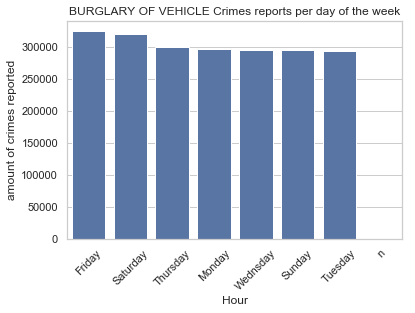

In [137]:
crimes_per_wod = df.weekday.value_counts()
g = sns.barplot(x=crimes_per_wod.index, y=crimes_per_wod.values, color='b')
g.set(xlabel='Hour', ylabel='amount of crimes reported')
plt.title('BURGLARY OF VEHICLE Crimes reports per day of the week')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

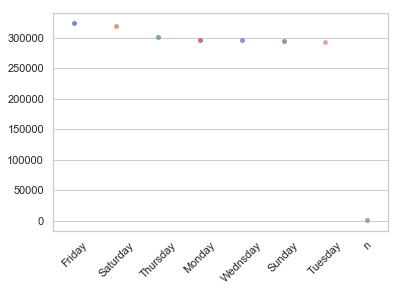

In [126]:
g = sns.stripplot(x=crimes_per_wod.index, y=crimes_per_wod.values,
              data=df, dodge=True, jitter=False,
              alpha=0.8, zorder=1)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

In [11]:
#top 10 zip codes 
df.fillna(0, inplace=True)
df['Zip Code'] = df['Zip Code'].apply(lambda x: str(x)[:5])
Top10 = df[df['Zip Code']!='0.0']['Zip Code'].value_counts().sort_values(ascending=False).head(10)
Top10.index

Index(['78741', '78753', '78701', '78758', '78704', '78745', '78702', '78744',
       '78723', '78752'],
      dtype='object')

Text(0.5, 1.0, 'Zip Codes with the highest crime rate')

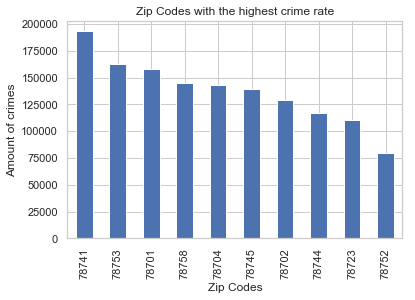

In [139]:
Top10.plot(kind='bar')
plt.xlabel("Zip Codes")
plt.ylabel("Amount of crimes")

plt.title('Zip Codes with the highest crime rate')

Text(0.5, 1.0, 'Zip Codes with the highest BURGLARY OF VEHICLE crime rate')

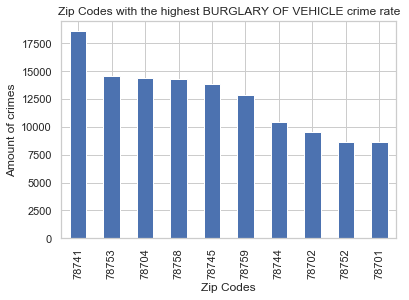

In [140]:
top10_zip_BOF = df[(df['Zip Code'] != "0.0") & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')]['Zip Code'].value_counts().sort_values(ascending = False).head(10)
top10_zip_BOF.plot(kind = 'bar')
plt.xlabel("Zip Codes")
plt.ylabel("Amount of crimes")
plt.title('Zip Codes with the highest BURGLARY OF VEHICLE crime rate')

Text(0.5, 1.0, 'BURGLARY OF VEHICLE amount of crimes for Zip Code 78741')

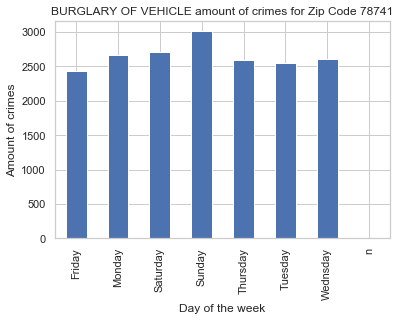

In [142]:
Zip78741 = df[(df['Zip Code'] == '78741') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] .groupby('weekday')["Location Type"].count()
Zip78741.plot(kind = 'bar')
plt.xlabel("Day of the week")
plt.ylabel("Amount of crimes")
plt.title('BURGLARY OF VEHICLE amount of crimes for Zip Code 78741')

Text(0.5, 1.0, 'BURGLARY OF VEHICLE amount of crimes for Zip Code 78741')

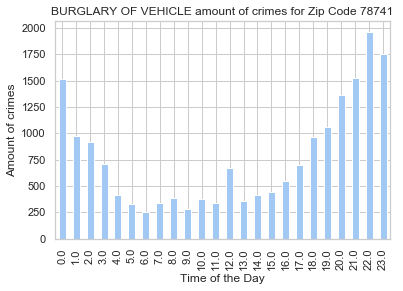

In [176]:
df[(df['Zip Code'] == '78741') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] .groupby('hour')["Location Type"].count().plot(kind = 'bar')
plt.xlabel("Time of the Day")
plt.ylabel("Amount of crimes")
plt.title('BURGLARY OF VEHICLE amount of crimes for Zip Code 78741')

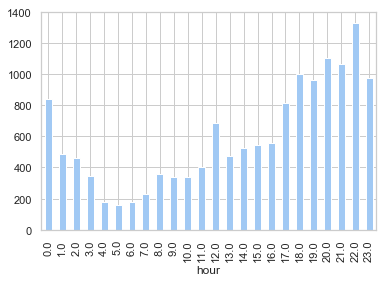

In [181]:
df[(df['Zip Code'] == '78704') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] .groupby('hour')["Location Type"].count().plot(kind = 'bar')


In [152]:
sample1 = df[(df['Zip Code'] == '78741') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] .groupby('hour')["Location Type"].count().values
sample2 = df[(df['Zip Code'] == '78704') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] .groupby('hour')["Location Type"].count().values


In [153]:
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=-1.4124977443145275, pvalue=0.16560765268539107)


In [154]:
mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=247.5, pvalue=0.20474016484933738)

In [167]:
sample1 = df[(df['hour'] == 12.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')].groupby('Zip Code')["Location Type"].count().values
sample2 = df[(df['hour'] == 22.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')].groupby('Zip Code')["Location Type"].count().values


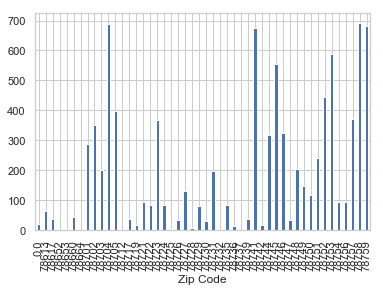

In [172]:
df[(df['hour'] == 12.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')].groupby('Zip Code')["Location Type"].count().plot(kind = 'bar')


In [168]:
ttest_ind(sample2, sample1, equal_var=False)

Ttest_indResult(statistic=3.0012689673568853, pvalue=0.003786492336316509)

In [170]:
mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=918.0, pvalue=0.03155227944496901)

In [192]:
#df[df['Highest Offense Description'] == 'BURGLARY OF VEHICLE'].groupby('Location Type').count().sort_values(ascending = False)
df[df['Highest Offense Description'] == 'BURGLARY OF VEHICLE']['Location Type'].value_counts().sort_values(ascending = False).head(10)

PARKING LOTS / GARAGE           93947
RESIDENCE / HOME                61296
STREETS / HWY / ROAD / ALLEY    28739
COMMERCIAL / OFFICE BUILDING     9960
OTHER / UNKNOWN                  5300
HOTEL / MOTEL / ETC.             3287
RESTAURANTS                      3104
GOVERNMENT / PUBLIC BUILDING      920
PARK / PLAYGROUND                 703
DEPARTMENT / DISCOUNT STORE       647
Name: Location Type, dtype: int64

In [193]:
df[(df['Zip Code'] == '78741') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10)

PARKING LOTS / GARAGE           10912
RESIDENCE / HOME                 5225
STREETS / HWY / ROAD / ALLEY     1094
COMMERCIAL / OFFICE BUILDING      346
HOTEL / MOTEL / ETC.              308
OTHER / UNKNOWN                   289
BAR / NIGHT CLUB                   74
RESTAURANTS                        59
GROCERY / SUPERMARKET              37
0                                  34
Name: Location Type, dtype: int64

In [194]:
#downtown
df[(df['Zip Code'] == '78701') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10)

STREETS / HWY / ROAD / ALLEY    3876
PARKING LOTS / GARAGE           3495
RESIDENCE / HOME                 355
COMMERCIAL / OFFICE BUILDING     222
HOTEL / MOTEL / ETC.             216
OTHER / UNKNOWN                  170
0                                 52
RESTAURANTS                       51
BAR / NIGHT CLUB                  41
GOVERNMENT / PUBLIC BUILDING      31
Name: Location Type, dtype: int64

In [195]:
df[(df['Zip Code'] == '78704') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10)

PARKING LOTS / GARAGE           6519
RESIDENCE / HOME                3929
STREETS / HWY / ROAD / ALLEY    1989
COMMERCIAL / OFFICE BUILDING     616
OTHER / UNKNOWN                  359
RESTAURANTS                      254
GOVERNMENT / PUBLIC BUILDING     142
HOTEL / MOTEL / ETC.             123
PARK / PLAYGROUND                 74
BAR / NIGHT CLUB                  45
Name: Location Type, dtype: int64

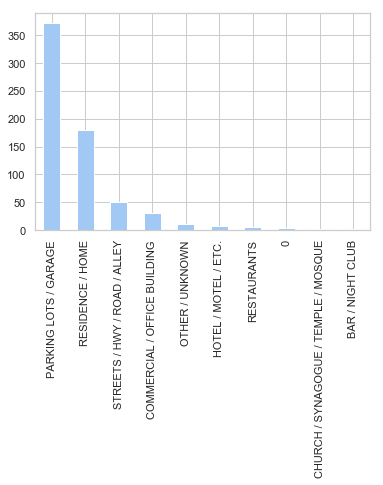

In [199]:
df[(df['Zip Code'] == '78741') & (df['hour'] == 12.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')

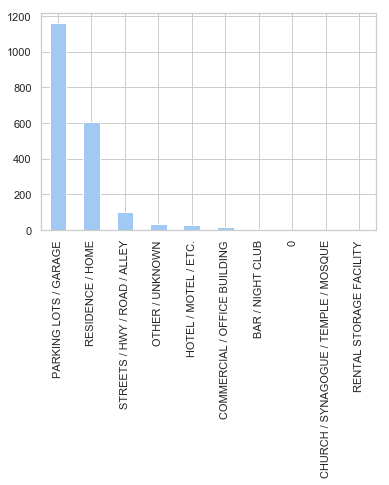

In [200]:
df[(df['Zip Code'] == '78741') & (df['hour'] == 22.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')

we have a big problem with burglary of vehicle. We can see the neighbours where this type of crime happens thr most. We investigated that it's not abou the day of the week. The most crimes have been committed on Friday and Saturday. A time - it's 12PM and 10 PM. A location type - it's PARKING LOTS / GARAGE, RESIDENCE / HOME and STREETS / HWY / ROAD / ALLEY. 


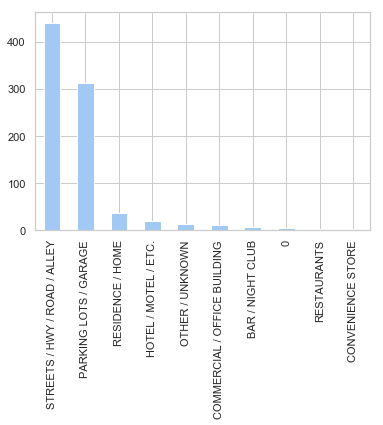

In [201]:
df[(df['Zip Code'] == '78701') & (df['hour'] == 22.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')

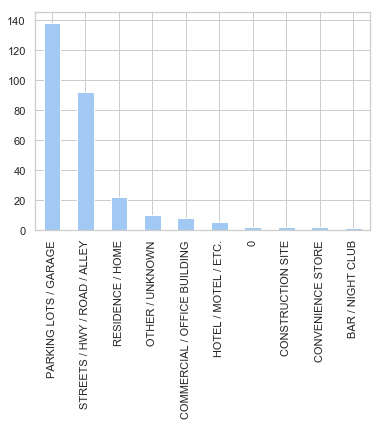

In [202]:
df[(df['Zip Code'] == '78701') & (df['hour'] == 12.0) & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')] ['Location Type'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')

### Analysis of highlights
We have a big problem with burglary of a vehicle. We can see the neighbors where this type of crime happens the most. We investigated that it's not about the day of the week. Most crimes have been committed on Friday and Saturday. A time - it's 12 PM and 10 PM. A location type - it's PARKING LOTS / GARAGE, RESIDENCE / HOME and STREETS / HWY / ROAD / ALLEY.
Interesting thing - in the downtown the most crimes at 12 pm have been committed in the garage/parking lots but at 10 pm - on the street. 

### A rollout plan
Based on our analysis of data, burglary of a vehicle is the most popular crime especially in zip code 78741. We will focus on crime reduction. The popular neighbourhood for work is a downtown area that has zip code 78701.
We will take data we have as a control sample. We will have zip Code 78741 - residence place as a test sample 1, zip code 78653 as a test sample 2 and 78701 as a test sample 3. 

We have 3 major direction: Garages/parking slots, streets, and residences. 

For test sample 1 we will place more video cameras and signs about video recording on the garages, streets, and residences
For test sample 2 we will increase police car patrolling around the neighbourhood
For test sample 3 we will place more video cameras and signs about video recording on the garages for the garages and parking slots and increasing police car patrolling on the streets. 

### An evaluation plan



How long the experiment should last? 

In [13]:
df['year']= pd.to_datetime(df['Occurred Date'], format='%m/%d/%Y').dt.year


In [21]:
df['month']= pd.to_datetime(df['Occurred Date'], format='%m/%d/%Y').dt.month


In [38]:
df[(df.year==2018) & (df['Zip Code'] == '78741') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')].count()


Highest Offense Description    795
Family Violence                795
Occurred Date Time             795
Occurred Date                  795
Occurred Time                  795
Report Date Time               795
Location Type                  795
Address                        795
Zip Code                       795
Category Description           795
Latitude                       795
Longitude                      795
Location                       795
year                           795
month                          795
dtype: int64

In [37]:
month = df[(df.year==2018) & (df['Zip Code'] == '78741') & (df['Highest Offense Description'] == 'BURGLARY OF VEHICLE')].groupby('month').count()

month.mean()

Highest Offense Description    66.25
Family Violence                66.25
Occurred Date Time             66.25
Occurred Date                  66.25
Occurred Time                  66.25
Report Date Time               66.25
Location Type                  66.25
Address                        66.25
Zip Code                       66.25
Category Description           66.25
Latitude                       66.25
Longitude                      66.25
Location                       66.25
year                           66.25
dtype: float64

Assuming that in average 66 crimes committing every month and in 2018 have been reported 795 crimes, so to see the differences we meed at least 60% of year crimes that means approximately 7 months.

After 7 months we will colect new data we will compare the results of groups using analisys and t-test. 